In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split ##to spllitting dataset
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix ,roc_auc_score ,roc_curve, f1_score, recall_score, precision_score, classification_report
import matplotlib.pyplot as plt #for AUC & ROC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

Preprocessing for Breast Cancer Dataset:

In [ ]:

s = StandardScaler()
X_s = s.fit_transform(X)
print("Mean:", X_s.mean())
print("Standard deviation:", X_s.std())

Mean: -6.826538293184326e-17
Standard deviation: 1.0


Splitting the dataset into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_s, y, test_size=0.2 )#random_state=42) # 80% fot training, 20% testing,42 هدا يخلي النتيجة ثابتة كل مرة


# Training Model with **Logistic Regression** Part

In [ ]:
LR_model=LogisticRegression(max_iter=1000) #maximize the itirations to doesn't stop early
LR_model.fit(X_train, y_train) #train model on the training data



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
GaussianNB=GaussianNB()
GaussianNB.fit(X_train, y_train)
BernoulliNB=BernoulliNB()
BernoulliNB.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

Model Evaluation

In [ ]:
pred_LR = LR_model.predict(X_test)
pred_GNB = GaussianNB.predict(X_test)
pred_BNB = BernoulliNB.predict(X_test)

In [ ]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test,pred_LR))
print("Recall:", recall_score(y_test,pred_LR, pos_label='M'))
print("Precision:", precision_score(y_test,pred_LR, pos_label='M'))
print("f1:", f1_score(y_test,pred_LR, pos_label='M'))
print("roc_auc:", roc_auc_score((y_test == 'M'),(pred_LR == 'M')))
print("\n")
print("GaussianNB:")
print("Accuracy:", accuracy_score(y_test,pred_GNB))
print("Recall:", recall_score(y_test,pred_GNB, pos_label='M'))
print("Precision:", precision_score(y_test,pred_GNB, pos_label='M'))
print("f1:", f1_score(y_test,pred_GNB, pos_label='M'))
print("roc_auc:", roc_auc_score((y_test == 'M'),(pred_GNB == 'M')))
print("\n")
print("BernoulliNB:")
print("Accuracy:", accuracy_score(y_test,pred_BNB))
print("Recall:", recall_score(y_test,pred_BNB, pos_label='M'))
print("Precision:", precision_score(y_test,pred_BNB, pos_label='M'))
print("f1:", f1_score(y_test,pred_BNB, pos_label='M'))
print("roc_auc:", roc_auc_score((y_test == 'M'),(pred_BNB == 'M')))

Logistic Regression:
Accuracy: 0.9912280701754386
Recall: 0.9743589743589743
Precision: 1.0
f1: 0.987012987012987
roc_auc: 0.9871794871794872


GaussianNB:
Accuracy: 0.9473684210526315
Recall: 0.8717948717948718
Precision: 0.9714285714285714
f1: 0.918918918918919
roc_auc: 0.9292307692307693


BernoulliNB:
Accuracy: 0.956140350877193
Recall: 0.9230769230769231
Precision: 0.9473684210526315
f1: 0.935064935064935
roc_auc: 0.9482051282051284


**About the results:**
Accuracy: the model predicted correctly **98.24%** of all cases, it only made one mistake>

Confusion Matrix: 70 (TN) the Model said “Benign (0)” and it was Benign

42 (TP):
Model said “Malignant (1)” and it was Malignant

2 (FN):
Model said “Benign (0)” but it was actually Malignant (1)

0 (FP):
Model never said “Malignant” when it was actually Benign

Classification report:
precision: 99% accurate when saying “Benign” , 1.00 -> always correct when saying “Malignant”

recall: 1.00 → caught all benigns , 98% of malignants (missed 1)


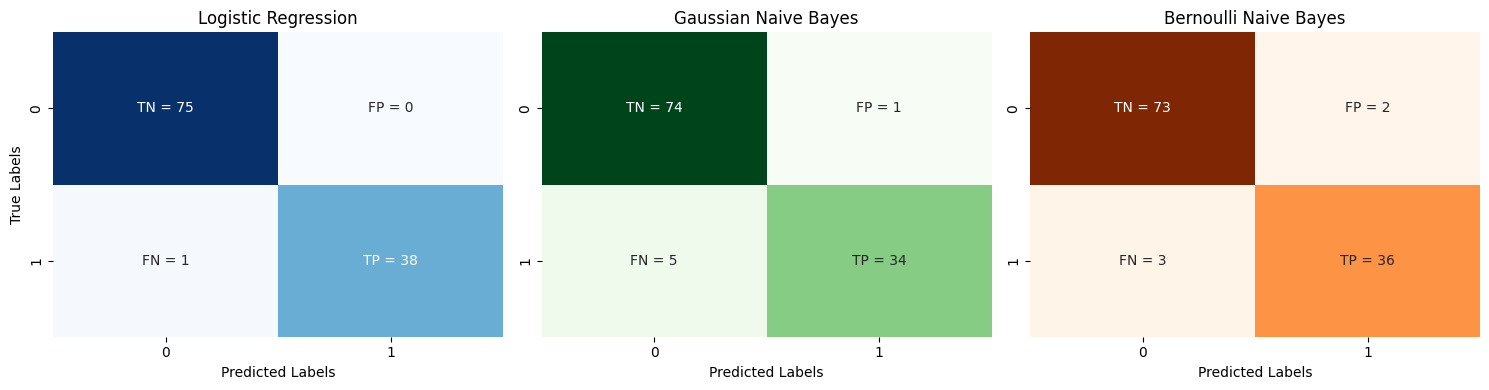

In [ ]:
# 3.4 Confusion Matrices for each model (Adult Income)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ---- 0) Make predictions if you don't already have them ----
# (Uncomment if needed)
# y_pred_lr = log_model.predict(X_test_scaled)       # Logistic Regression
# y_pred_nb = bnb_model.predict(X_test_scaled)       # Bernoulli Naive Bayes
# y_pred_dt = dt_model.predict(X_test_scaled)        # Decision Tree


cm_lr = confusion_matrix(y_test, pred_LR, labels=['B','M'])
cm_gnb = confusion_matrix(y_test, pred_GNB, labels=['B','M'])
cm_bnb = confusion_matrix(y_test, pred_BNB, labels=['B','M'])

# ---- 2) Helper to add TN/FP/FN/TP text on the heatmap ----
def add_labels(cm):
    tn, fp, fn, tp = cm.ravel()
    return np.array([[f"TN = {tn}", f"FP = {fp}"],
                     [f"FN = {fn}", f"TP = {tp}"]])

annot_lr = add_labels(cm_lr)
annot_gnb = add_labels(cm_gnb)
annot_bnb = add_labels(cm_bnb)

# ---- 3) Plot the three heatmaps side-by-side ----
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(cm_lr, annot=annot_lr, fmt='', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(cm_nb, annot=annot_gnb, fmt='', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title('Gaussian Naive Bayes')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('')   # empty to keep it clean

sns.heatmap(cm_dt, annot=annot_bnb, fmt='', cmap='Oranges', cbar=False, ax=axes[2])
axes[2].set_title('Bernoulli Naive Bayes')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


**About the results:**
Accuracy: the model predicted correctly 92.98% of all cases, which means it made around 8 mistakes out of 114 samples.

Confusion Matrix:

65 (TN): Model said “Benign (0)” and it was Benign.

40 (TP): Model said “Malignant (1)” and it was Malignant.

5 (FN): Model said “Benign (0)” but it was actually Malignant (1) -> missed some cancer cases.

4 (FP): Model said “Malignant (1)” but it was actually Benign (0) -> false alarm.

Classification report:

Precision:

0 -> 94% accurate when saying “Benign”.

1 -> 91% accurate when saying “Malignant”.

Recall:

0 -> caught 96% of benign cases.

1 -> caught 86% of malignant cases (missed 14%)

# ROC-AUC Score Part:

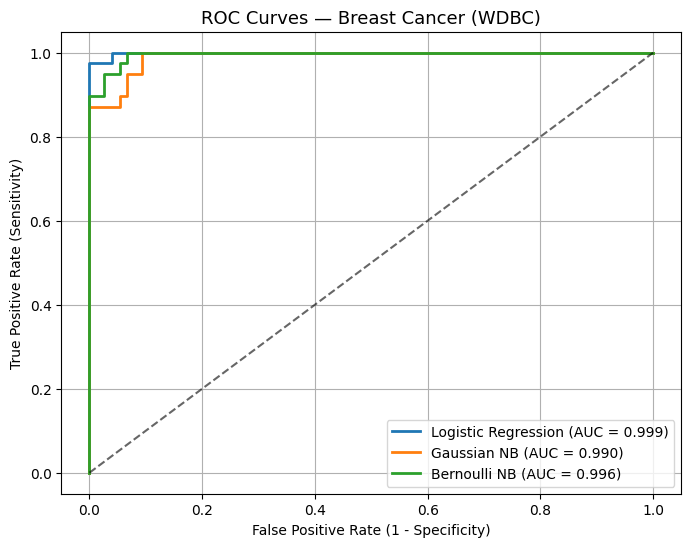

In [ ]:
import matplotlib.pyplot as plt

y_test_binary = (y_test == 'M').astype(int)

y_proba_lr = LR_model.predict_proba(X_test)[:, 1] #logistic
y_proba_gnb = GaussianNB.predict_proba(X_test)[:, 1]#gaussian NB
y_proba_bnb = BernoulliNB.predict_proba(X_test)[:, 1]

#AUC..
auc_lr = roc_auc_score(y_test_binary, y_proba_lr)
auc_gnb = roc_auc_score(y_test_binary, y_proba_gnb)
auc_bnb = roc_auc_score(y_test_binary, y_proba_bnb)


#calculate roc curve points ->FPR & TPR
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_proba_lr)
fpr_gnb, tpr_gnb, _ = roc_curve(y_test_binary, y_proba_gnb)
fpr_bnb, tpr_bnb, _ = roc_curve(y_test_binary, y_proba_bnb)

#drowing curves
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})", linewidth=2)
plt.plot(fpr_gnb, tpr_gnb, label=f"Gaussian NB (AUC = {auc_gnb:.3f})", linewidth=2)
plt.plot(fpr_bnb, tpr_bnb, label=f"Bernoulli NB (AUC = {auc_bnb:.3f})", linewidth=2)

# guessing randomly
plt.plot([0,1], [0,1], 'k--', alpha=0.6)

plt.title("ROC Curves — Breast Cancer (WDBC)", fontsize=13)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



# **PART  2**
Download Adult Dataset:

In [45]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

adultData = pd.read_csv("adult.data", header=None, names=column_names, na_values=' ?', skipinitialspace=True)
adultData.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Preprocessing for Breast Cancer Dataset:

In [46]:
adultData.isnull() #Check missing values

adultData = adultData.dropna() #remove rows with missing values

for column in adultData.columns: #Check unique values for each column to know its type
    print(f"{column}: {adultData[column].unique()[:5]}")


age: [39 50 38 53 28]
workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov']
fnlwgt: [ 77516  83311 215646 234721 338409]
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th']
education-num: [13  9  7 14  5]
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
capital-gain: [ 2174     0 14084  5178  5013]
capital-loss: [   0 2042 1408 1902 1573]
hours-per-week: [40 13 16 45 50]
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?']
income: ['<=50K' '>50K']


In [ ]:
adultData = adultData.replace(r'^\?\$', pd.NA, regex=True) #replace evry (?) with (NAN) to delete it
adultData.isna().sum() #check how much missing
adultData =adultData.dropna().reset_index(drop=True) # delete missing rows (simlest way for me:)

adultData.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


Replace Income Lable to numeric:

In [ ]:
LE=LabelEncoder()
adultData['income'] = LE.fit_transform(adultData['income'])
adultData['income'].unique()

array([0, 1])

previous result meaning: **0= (50=>) , 1= (50<)**

replace th remining categorical columns to numbers:

In [ ]:
adultData['sex'] = adultData['sex'].str.strip().map({'Male': 1, 'Female': 0}) #convert sex to zero and one

 #onehot encoding to remining categorical columns
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
adultData = pd.get_dummies(adultData, columns=cat_cols, drop_first=True)

adultData.head()


,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,1,0,0,13,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False


Spliting data into X(featurs) and Y(Target) aand then split it into trainig and testing:

In [ ]:
#separate featurs from target
X = adultData.drop('income', axis=1) #featurs
y = adultData['income'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#spliting data 30% testing, 70% training

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(22792, 100) (9769, 100) (22792,) (9769,)


Scaling patr for adult dataset:

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)


(22792, 100) (9769, 100)


MODEL1 Logistic Regression Part

In [ ]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train) # creat the model and train it

y_pred = log_model.predict(X_test_scaled) #prediction on trainig data

#Evaluation Part
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8537209540382844

Confusion Matrix:
 [[6902  515]
 [ 914 1438]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7417
           1       0.74      0.61      0.67      2352

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



About the Results (Logistic Regression on Adult Dataset):

**Accuracy:** The model correctly predicted 85.37% of all cases, which means it classified most income levels correctly.

**Confusion Matrix:**
6902 (TN): Model said “<=50K (0)” and it was correct.

1438 (TP): Model said “>50K (1)” and it was correct.

515 (FP): Model said “>50K (1)” but it was actually “<=50K (0)” -> false alarm.

914 (FN): Model said “<=50K (0)” but it was actually “>50K (1)” -> missed some high-income cases.

**Classification Report:**

Precision:
Class 0 (<=50K): 88% accurate when predicting low income.
Class 1 (>50K): 74% accurate when predicting high income.

**Recall:**
Class 0 (<=50K): caught 93% of low income cases.
Class 1 (>50K): caught 61% of high income cases missed 39%.

Next Step is MODEL2 **Random Forest Classifier:**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)#create and train model

y_pred_rf = rf_model.predict(X_test_scaled) #prediction

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8570989865902344

Confusion Matrix:
 [[6894  523]
 [ 873 1479]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7417
           1       0.74      0.63      0.68      2352

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



# about the previous results: (Random Forest Classifier):

Accuracy:The model correctly predicted 96.49% of all cases, which means it made very few mistakes compared to the previous model.

**Confusion Matrix:**77 (TN): Model said “Class 0” and it was correct.
33 (TP): Model said “Class 1” and it was correct.

0 (FP): Model said “Class 1” but it was actually “Class 0” -> false alarm.

4 (FN): Model said “Class 0” but it was actually “Class 1” -> missed a few
positive cases.

**Classification Report:**

Precision: Class 0 -> 95% accurate when predicting Class 0.
Class 1 -> 100% accurate when predicting Class 1.

Recall: Class 0 -> caught 100% of Class 0 cases.
Class 1 -> caught 89% of Class 1 cases (missed only 11%).

**F1-Score:**
Class 0 -> 0.97
Class 1 -> 0.94

The F1 score combines precision and recall into one value

Higher F1 means the model is balanced it's not only predicts correctly but also catches most of the true cases
This shows the Random Forest model performs consistently well on both classes

MODEL3 Decision Tree Classifier:

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train) #create and train model

y_pred_dt = dt_model.predict(X_test_scaled)  #prediction

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.8119561879414474

Confusion Matrix:
 [[6442  975]
 [ 862 1490]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      7417
           1       0.60      0.63      0.62      2352

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.75      9769
weighted avg       0.82      0.81      0.81      9769



# About the previous Results (Decision Tree Classifier):

**Accuracy:** The model correctly predicted 81.19% of all cases, which means it made more mistakes compared to the Logistic Regression and Random Forest models

**Confusion Matrix:**
6442 (TN): Model said “Class 0” and it was correct.
1490 (TP): Model said “Class 1” and it was correct.
975 (FP): Model said “Class 1” but it was actually “Class 0” → false alarm.
862 (FN): Model said “Class 0” but it was actually “Class 1” → missed positive cases.

**Classification Report:**
**Precision:**

Class 0 -> 88% accurate when predicting Class 0.

Class 1 -> 60% accurate when predicting Class 1.

**Recall:**
Class 0 -> caught 87% of Class 0 cases.
Class 1 -> caught 63% of Class 1 cases.

**F1-Score:**
Class 0 -> 0.88
Class 1 -> 0.62
this shows that the model performs well for Class 0, but it struggles more with class 1

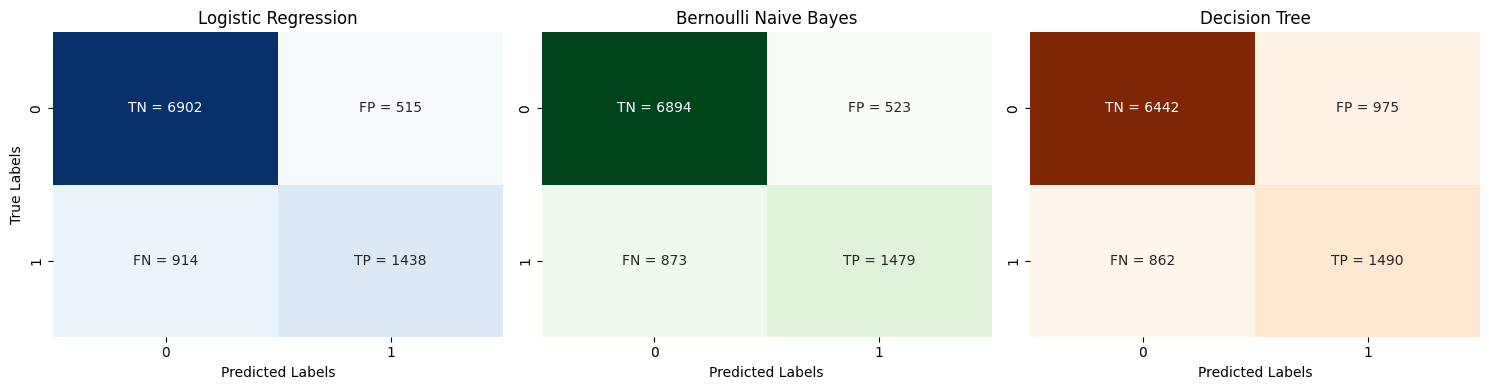

In [ ]:
# 3.4 Confusion Matrices for each model (Adult Income)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ---- 0) Make predictions if you don't already have them ----
# (Uncomment if needed)
# y_pred_lr = log_model.predict(X_test_scaled)       # Logistic Regression
# y_pred_nb = bnb_model.predict(X_test_scaled)       # Bernoulli Naive Bayes
# y_pred_dt = dt_model.predict(X_test_scaled)        # Decision Tree

# ---- 1) Confusion matrices (ensure labels order [0,1]) ----
cm_lr = confusion_matrix(y_test, y_pred, labels=[0, 1])
cm_nb = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=[0, 1])

# ---- 2) Helper to add TN/FP/FN/TP text on the heatmap ----
def add_labels(cm):
    tn, fp, fn, tp = cm.ravel()
    return np.array([[f"TN = {tn}", f"FP = {fp}"],
                     [f"FN = {fn}", f"TP = {tp}"]])

annot_lr = add_labels(cm_lr)
annot_nb = add_labels(cm_nb)
annot_dt = add_labels(cm_dt)

# ---- 3) Plot the three heatmaps side-by-side ----
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(cm_lr, annot=annot_lr, fmt='', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(cm_nb, annot=annot_nb, fmt='', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title('Bernoulli Naive Bayes')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('')   # empty to keep it clean

sns.heatmap(cm_dt, annot=annot_dt, fmt='', cmap='Oranges', cbar=False, ax=axes[2])
axes[2].set_title('Decision Tree')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


# ROC-AUC Score Part:

ROC-AUC (Logistic Regression): 0.908
ROC-AUC (Random Forest): 0.907
ROC-AUC (Decision Tree): 0.751


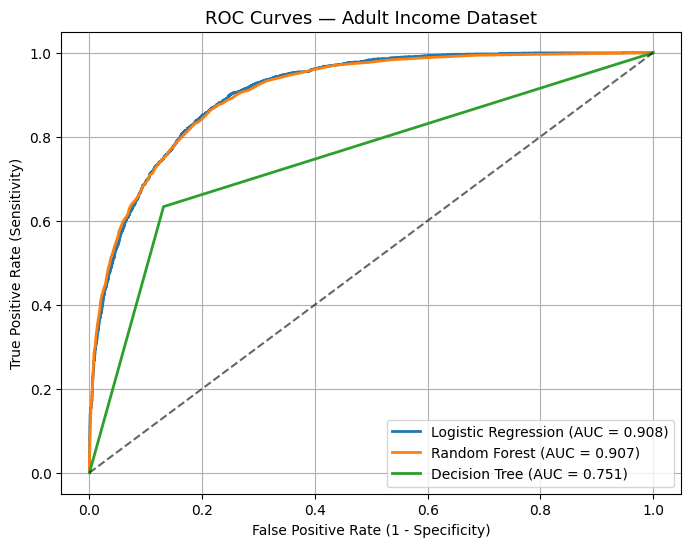

In [ ]:
import matplotlib.pyplot as plt

#prediction proba( >50K ) to calculating roc curves:
y_proba_lr = log_model.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

#AUC..
auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_dt = roc_auc_score(y_test, y_proba_dt)

print(f"ROC-AUC (Logistic Regression): {auc_lr:.3f}")
print(f"ROC-AUC (Random Forest): {auc_rf:.3f}")
print(f"ROC-AUC (Decision Tree): {auc_dt:.3f}")

#curve points for each roc model:
fpr_lr , tpr_lr, _ = roc_curve(y_test , y_proba_lr)
fpr_rf , tpr_rf, _ = roc_curve(y_test , y_proba_rf)
fpr_dt , tpr_dt, _ = roc_curve(y_test, y_proba_dt)

# drowing part
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})", linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})", linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})", linewidth=2)
plt.plot([0,1], [0,1], 'k--', alpha=0.6) #the line that's guesses randomly

plt.title("ROC Curves — Adult Income Dataset", fontsize=13)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **Comparative Analysis**